In [2]:
%env CUDA_VISIBLE_DEVICES=0
%load_ext autoreload
%autoreload 2
from d3exp.config.defaults import defaults_dict
from d3exp.beta_schedules import get_beta_schedule
from d3exp.transitions import get_transition
from d3exp.diffusion import jax_float64_context
import numpy as np
from matplotlib import pyplot as plt
import jax.random as jrnd
from copy import deepcopy
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

env: CUDA_VISIBLE_DEVICES=0


2023-04-28 19:44:16.173300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
for key, config in defaults_dict.items():
    a = deepcopy(defaults_dict[key])
    a.update(dict(num_classes=8))
    defaults_dict[key] = a

In [7]:
with jax_float64_context():
    transition_matrices = {
        config.transition_type: get_transition(config, rng=jrnd.PRNGKey(config.seed)) if config.transition_type == "random_double_stochastic" else get_transition(config)
        for key, config in defaults_dict.items()
    }

2023-04-28 19:44:50.023697: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [8]:
transition_matrices

{'uniform': <d3exp.transitions.UniformTransition at 0x7f3b76d8ba60>,
 'gaussian': <d3exp.transitions.GaussianTransition at 0x7f3b76d8b280>,
 'absorbing': <d3exp.transitions.AbsorbingTransition at 0x7f3b76d8ae90>,
 'random_double_stochastic': <d3exp.transitions.RandomDoublyStochasticTransition at 0x7f3b76d8a2f0>}

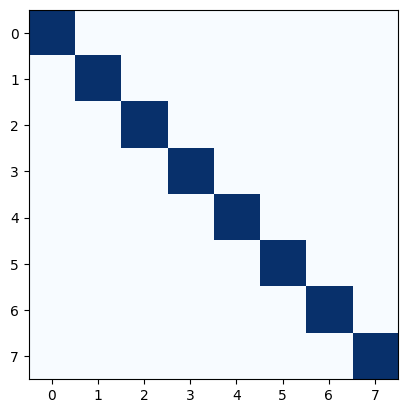

In [9]:
a = transition_matrices["uniform"]._get_transition_matrix(0, 0.2)
plt.imshow(a, cmap="Blues")

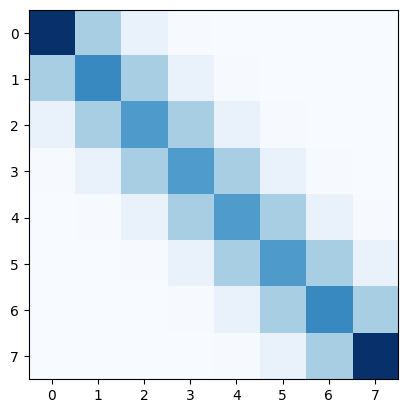

In [10]:
a = transition_matrices["gaussian"]._get_transition_matrix(0, 0.2)
plt.imshow(a, cmap="Blues")

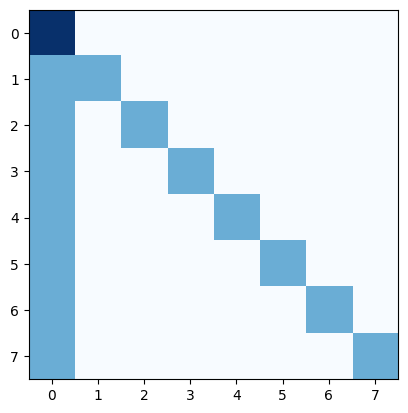

In [11]:
a = transition_matrices["absorbing"]._get_transition_matrix(0, 0.5)
plt.imshow(a, cmap="Blues")

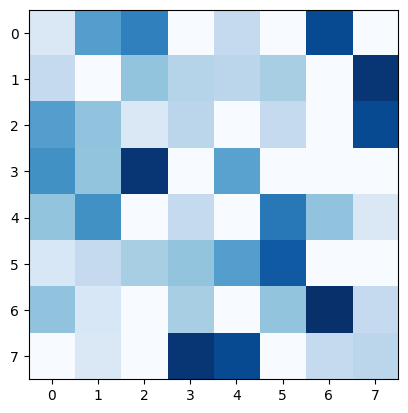

In [18]:
a = transition_matrices["random_double_stochastic"].transition_matrices[1]
plt.imshow(a, cmap="Blues")